# Exploratory Data Analysis for Final Project

In this assignment, your task is to put your new skils to use in the form of an open-ended, exploratory data analysis. In particular, I'm looking for you to demonstrate your ability to use the programmatic tools we've been learning to access data, manipulate it, and visualize some findings while working towards the ultimate goal of developing a final project proposal. Please include the following in your assignment:

  1. A brief summary of the topic (a few sentences)
  2. Access 2 or more datasets, at least one of them using an API (if you are not using any data from an API as part of your project yet, don’t worry about it, and just do this to get some exercise using APIs. You might use it later).
  3. Demonstrate the use of Pandas operations to filter out missing data and/or outliers.
  4. Demonstrate your capacity to use some of the "group-by" operations to produce pivot tables or statistical summaries of your data.
  5. Use Matplotlib or Seaborn to produce 2-3 data visualizations of your data to both explore the data and highlight any notable patterns.
  6. Include a short written analysis of your interpretation of the data.
  7. In a few paragraphs, describe the research question you intend to investigate in your final project, and the plan for the data analysis you intend to perform.

Note that this exercise is intended to help you formulate your project topic. But it is not a binding contract. Your project will most likely evolve over the rest of the semester. So use this as an opportunity to be creative, throw some ideas against the wall and see what sticks. I will release the final project guidelines shortly. In the meantime, dig in!

And as always, please submit this assignment both as a PR on GitHub along with the URL of your PR on bCourses.

Summary at the end. Section one is related to my final project. I couldnt find API related to my project so used US population API for the purpose of this excercise 

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import numpy as np

In [83]:
busstops_df = pd.read_csv('busstops.csv')

In [92]:
print(busstops_df.head())

   _id                        Stop Name   Latitude  Longitude  \
0    1                 Baleveeranahalli  13.018604  77.393940   
1    2      Dasegowdrapalya Nelamangala  13.023470  77.394257   
2    3  Gayathrinagara Cross Sondekoppa  13.014778  77.383466   
3    4           Mallasandra Sondekoppa  13.002551  77.394141   
4    5       Nagasandrapalya Sondekoppa  13.001480  77.377390   

  Num_trips_in_stop Boothcode  \
0                 9  29150340   
1                 9  29150340   
2               124  29150340   
3               124  29150340   
4                 0  29150340   

                               Routes_with_num_trips  Total_trips  
0                      {'D35G-BVRH': 1, '242-LA': 8}            0  
1                      {'D35G-BVRH': 1, '242-LA': 8}            0  
2  {'D35G-BVRH': 1, '374-MA': 18, '221-L': 9, '24...            0  
3  {'D35G-BVRH': 1, '374-MA': 18, '221-L': 9, '24...            0  
4                                                 {}            0  


In [93]:
print(busstops_df.isnull().sum())

_id                       0
Stop Name                 2
Latitude                  0
Longitude                 0
Num_trips_in_stop         0
Boothcode                 0
Routes_with_num_trips    14
Total_trips               0
dtype: int64


In [95]:
print(busstops_df['Num_trips_in_stop'].head())

0      9
1      9
2    124
3    124
4      0
Name: Num_trips_in_stop, dtype: object


In [96]:
busstops_df['Num_trips_in_stop'] = pd.to_numeric(busstops_df['Num_trips_in_stop'])

In [100]:
busstops_df.dropna(subset=['Num_trips_in_stop'], inplace=True)

In [101]:
busstops_df['Routes_with_num_trips'] = busstops_df['Routes_with_num_trips'].apply(ast.literal_eval)

In [102]:
busstops_df['Total_trips'] = busstops_df['Num_trips_in_stop']

In [104]:
stop_pivot = busstops_df.groupby('Stop Name')['Total_trips'].sum().reset_index()

In [105]:
print(stop_pivot.head())

                      Stop Name  Total_trips
0          8th Mile Dasarahalli       1507.0
1                A Narayanapura          0.0
2  AECS Dental College Hulimavu        125.0
3                   AECS Layout          2.0
4           AGS Layout Ittamadu        147.0


/Users/aneeshmugulur/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


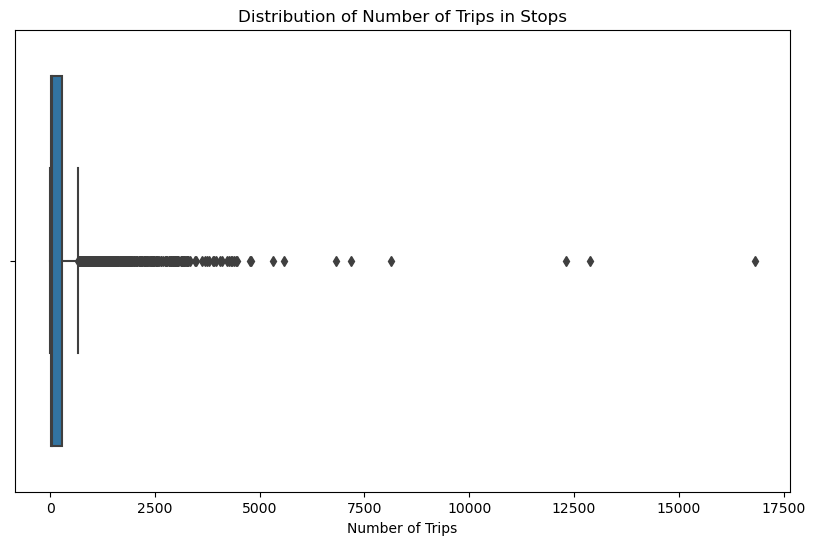

In [111]:
plt.figure(figsize=(10, 6))
sns.boxplot(busstops_df['Num_trips_in_stop'])
plt.title('Distribution of Number of Trips in Stops')
plt.xlabel('Number of Trips')
plt.show()

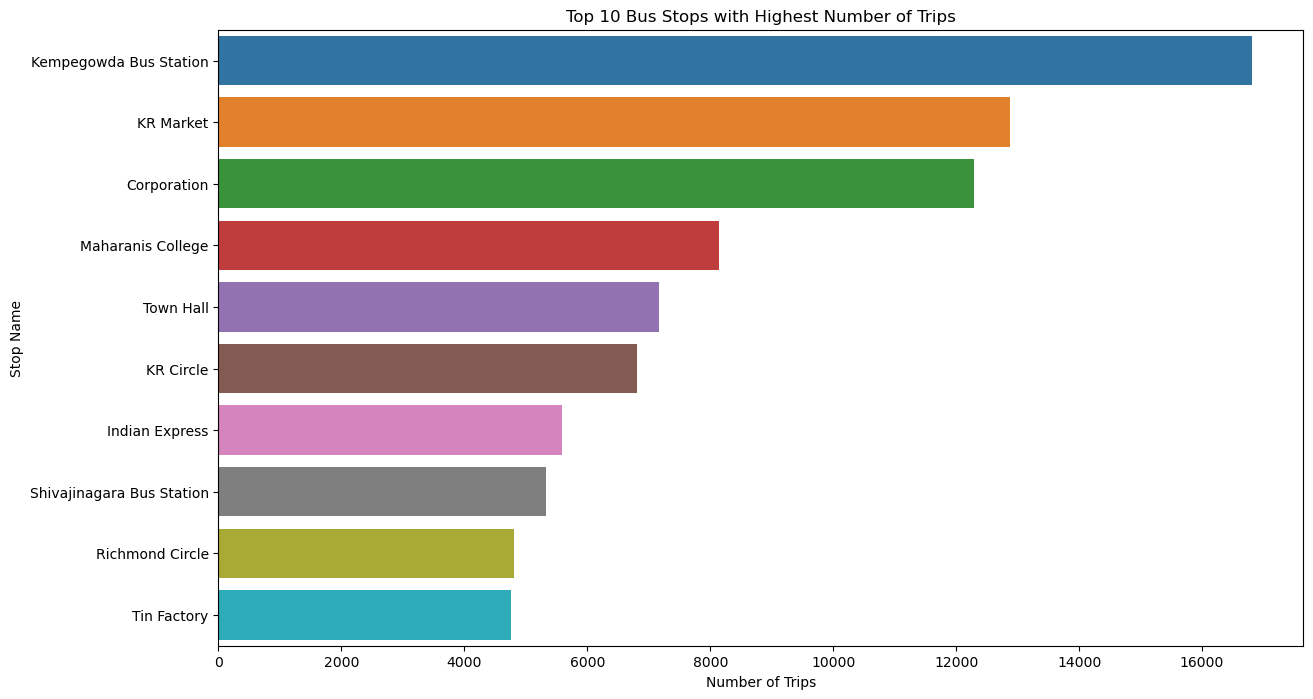

In [112]:
plt.figure(figsize=(14, 8))
top_10_stops = busstops_df.nlargest(10, 'Num_trips_in_stop')
sns.barplot(x='Num_trips_in_stop', y='Stop Name', data=top_10_stops)
plt.title('Top 10 Bus Stops with Highest Number of Trips')
plt.xlabel('Number of Trips')
plt.ylabel('Stop Name')
plt.show()

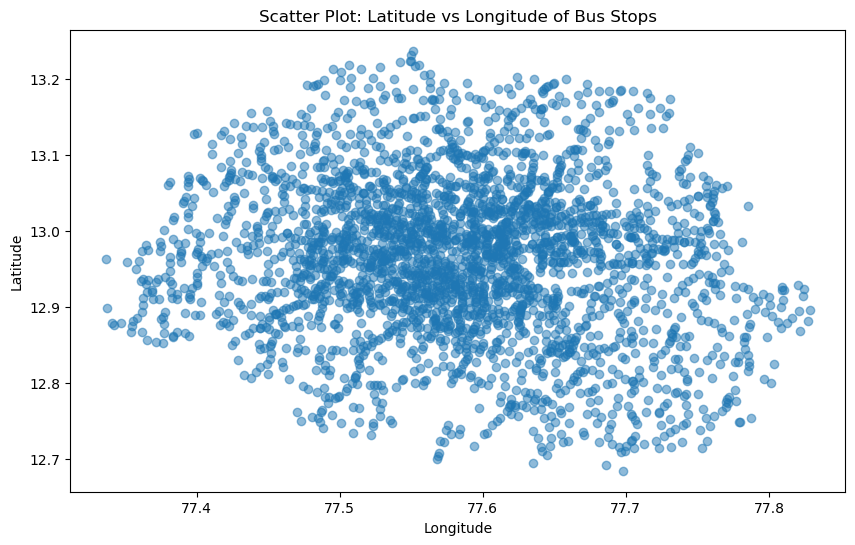

In [90]:
plt.figure(figsize=(10, 6))
plt.scatter(busstops_df['Longitude'], busstops_df['Latitude'], alpha=0.5)
plt.title('Scatter Plot: Latitude vs Longitude of Bus Stops')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

The "busstops.csv" dataset offers insights into bus stop characteristics, including their geographical locations and the number of trips they service. Analysis reveals varying levels of activity among bus stops, with some serving as major transportation hubs. Spatial distribution highlights clustering in certain areas, indicating population density and transportation patterns. Identifying the top 10 stops with the highest trip counts can inform route planning. At this point, I am looking for a more richer data source

The research question that I am focussing on it accesibility of bustsops for slum residents in Bangalore. Will be talking to you about it in detail during office hours. I need help!!

I couldn't find API related to above so using a different API for this assignment. 

In [114]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
api_url = "https://datausa.io/api/data?drilldowns=Nation&measures=Population"
response = requests.get(api_url)
data = response.json()["data"]


In [116]:
df = pd.DataFrame(data)

In [117]:
print(df.head())

  ID Nation         Nation  ID Year  Year  Population    Slug Nation
0   01000US  United States     2021  2021   329725481  united-states
1   01000US  United States     2020  2020   326569308  united-states
2   01000US  United States     2019  2019   324697795  united-states
3   01000US  United States     2018  2018   322903030  united-states
4   01000US  United States     2017  2017   321004407  united-states


In [118]:
df.dropna(inplace=True)

In [119]:
Q1 = df['Population'].quantile(0.25)
Q3 = df['Population'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Population'] >= Q1 - 1.5 * IQR) & (df['Population'] <= Q3 + 1.5 * IQR)]

In [120]:
pivot_table = df.pivot_table(index='Year', values='Population', aggfunc='mean')


In [121]:
print(df.describe())

           ID Year    Population
count     9.000000  9.000000e+00
mean   2017.000000  3.206241e+08
std       2.738613  5.982481e+06
min    2013.000000  3.115366e+08
25%    2015.000000  3.165150e+08
50%    2017.000000  3.210044e+08
75%    2019.000000  3.246978e+08
max    2021.000000  3.297255e+08


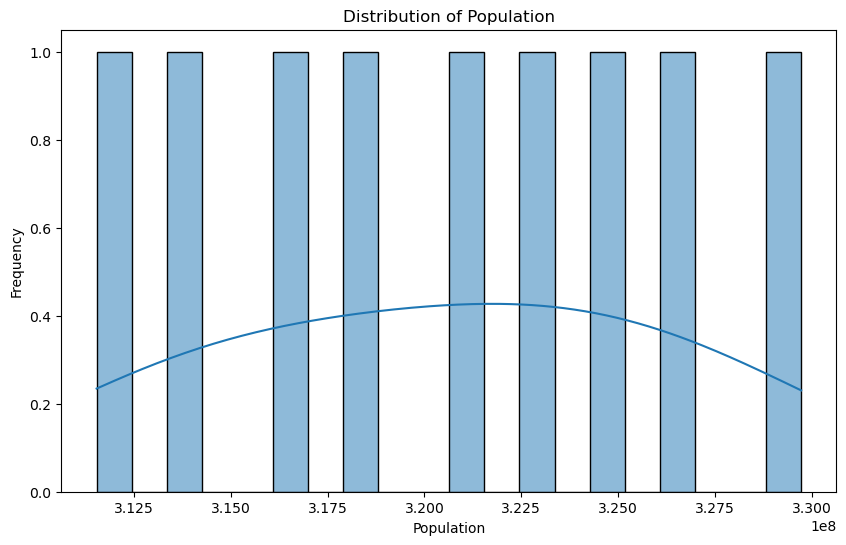

In [122]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Population'], bins=20, kde=True)
plt.title('Distribution of Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

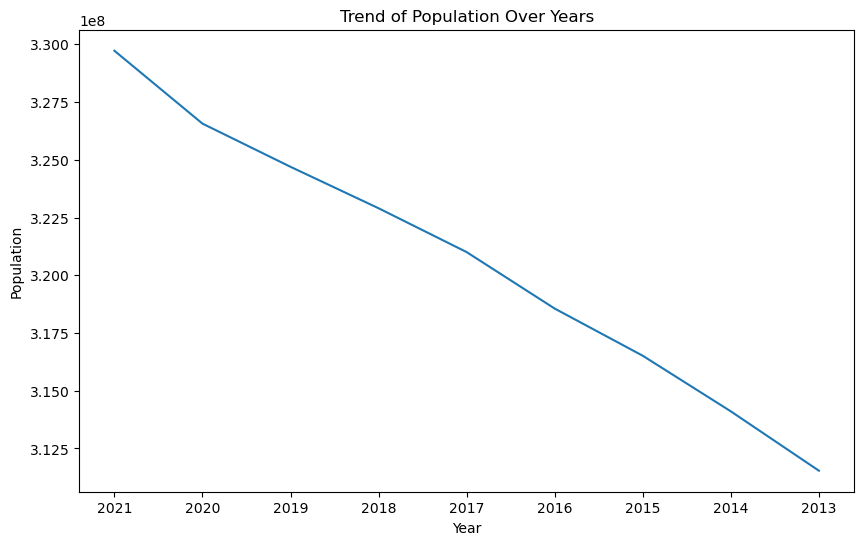

In [123]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Population', data=df)
plt.title('Trend of Population Over Years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()